In [13]:
import json
from pprint import pprint
from termcolor import colored
from colored import fg, bg, attr
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# if using a Jupyter notebook, includue:
%matplotlib inline
data_file = "../scores_predict_88_acc.jsonl"
id2name = "../data/id2name.json"

NUMBER_OF_SAMPELS = 100

color = bg('yellow_1') + fg('black')
reset = attr('reset')
blue = "blue"
green = "green"

print()

with open(id2name, 'r') as fp:
    id2name = json.load(fp)


In [14]:
def change_word_by_entity(entity_str, this_sentence,i,color):
        if list(map(lambda x: x.lower(), this_sentence[i:i + len(entity_str.split(" "))])) == entity_str.split():
            this_sentence = this_sentence[:i] + [colored(w, color, attrs=['bold']) for w in entity_str.split()] + \
                            this_sentence[i + len(entity_str.split(" ")):]
        return this_sentence


In [15]:
preffix = ""
def _show_sentence(head,tail,this_sentence,relation,correct_relation = None, is_prediction = False,prob : str = "",score: str = ""):
#     print(preffix + "head:", colored(head, 'blue', attrs=['bold']), "  ,  ", "tail", colored(tail, 'green', attrs=['bold']))          
    this_sentence = this_sentence.split()
    for i, word in enumerate(this_sentence):
            if word.lower() == head.split()[0]:
                this_sentence = change_word_by_entity(head, this_sentence,i,blue)
            if word.lower() == tail.split()[0]:
                this_sentence = change_word_by_entity(tail, this_sentence,i,green)
    color = 'yellow' if correct_relation is None or relation == correct_relation else 'grey'
    if is_prediction: color = "red"
    if len(prob) > 0:
        print(preffix + colored(relation, color,attrs=['bold']) + "\t", " ".join(this_sentence) +" " + colored(prob, "magenta",attrs=['bold'])+"; "+ 
              colored(score, "magenta",attrs=['bold']))
    else:
        print(preffix + colored(relation, color,attrs=['bold']) + "\t", " ".join(this_sentence))

In [16]:
def show_set(data):
    correct_relation = data['correct_relation']
    prediction = data["prediction"]
    query = data['query']
    head = data['query_head']
    tail = data['query_tail']
    probability = data['probability'].replace("'","")[1:-1].split(",")
    scores = data['scores']
    _show_sentence(head,tail,query,correct_relation)
    print()

    for k in range(5):
        this_sentence = data["sentence_" +str(k)]
        head = data['sentence_'+str(k)+'_head']
        tail = data['sentence_'+str(k)+'_tail']
        relation = data['sentence_'+str(k)+'_relation']
        _show_sentence(head,tail,this_sentence,relation,correct_relation,  k == int(prediction),probability[k],
                       "{:.2f}".format(scores[k]))
    print()
    return correct_relation
        

In [17]:
total_wrong = 0
total_correct = 0
result_per_type = {}
correct_scroes = []
wrong_scores = []
wrong_prediction_which_rel = {}
with open(data_file) as f:
    for ex_index,line in enumerate(f,1):
        data = json.loads(line)
        scores = data['scores']
        pred_rel = data['sentence_' + data["prediction"] +'_relation']
        pred_score = scores[int(data["prediction"])]
        the_gold_rel = data['correct_relation']
        if data['answer'] == "wrong":
            total_wrong +=1
            if pred_score > 60:
                print("wrong example number: ",total_wrong,  "example number: ", ex_index)
                show_set(data)
                print()
            wrong_prediction_which_rel[the_gold_rel] = wrong_prediction_which_rel.get(the_gold_rel,Counter())
            wrong_prediction_which_rel[the_gold_rel].update([pred_rel])
            wrong_scores.append(pred_score)
            result_per_type[the_gold_rel] = result_per_type.get(the_gold_rel,[[],[]])
            result_per_type[the_gold_rel][0].append(data)
            
            
        else:
            result_per_type[the_gold_rel] = result_per_type.get(the_gold_rel,[[],[]])
            result_per_type[the_gold_rel][1].append(data)
            correct_scroes.append(pred_score)
            total_correct +=1





wrong example number:  35 example number:  318
position played on team / speciality	 giulia perelli ( born 23 April 1982 in Livorno ) is an Italian women 's international footballer who plays as a defender .

constellation	 lambda virginis ( λ Virginis , abbreviated Lam Vir , λ Vir ) is a binary star system in the zodiac constellation of virgo . 0.00; 42.98
sport	 As a junior curler , Macleod played lead for eve muirhead 's rink at the 2011 World Junior Curling Championships .  0.71; 61.90
position played on team / speciality	 He made his first career sack with Kareem Martin as they both brought down Chicago Bears ' quarterback jimmy clausen for a ten - yard loss in the closing minutes of the fourth quarter .  0.29; 60.99
military rank	 He wrote to the Chief of the General Staff , lieutenant general vernon sturdee : For his part in the campaign in Greece , Rowell was mentioned in despatches a second time .  0.00; 48.41
located in or next to body of water	 One account notes , Alston and

wrong example number:  806 example number:  7217
child	 His first wife was drusilla of mauretania the elder , daughter of Cleopatra Selene II and juba ii of Numidia , and sister to Ptolemy of Mauretania .

spouse	 He was the second son of Count adolf iv of holstein and heilwig of lippe . 0.98; 60.52
child	 He was the second son of the geologist samuel pickworth woodward , the second son of the geologist and antiquary samuel woodward .  0.02; 56.74
competition class	 On 17 March 2007 , he took on daniel ponce de león who then held the WBO super bantamweight title .  0.00; 41.94
member of	 The fourth and fifth Shogun of the kamakura shogunate , Kujō Yoritsune and kujō yoritsugu , came from this clan .  0.00; 45.40
part of	 The McCallum rule was proposed by Bennett T. McCallum at carnegie mellon university 's tepper school of business .  0.00; 40.79


wrong example number:  822 example number:  7345
spouse	 His parents , david burke and Anna Calder - Marshall , are also actors , as were h

In [8]:
print(total_wrong/(total_correct+total_wrong))
print((total_correct+total_wrong))

0.1134
10000


In [9]:
for k,v in result_per_type.items():
    print("acc for ", k)
#     print("total from this category:",(len(v[0])+len(v[1])))
    print(len(v[1])/ (len(v[0])+len(v[1]) ))

acc for  member of
0.7068403908794788
acc for  crosses
0.9608433734939759
acc for  part of
0.45320197044334976
acc for  mother
0.9334442595673876
acc for  child
0.9182692307692307
acc for  main subject
0.7688356164383562
acc for  military rank
0.9717868338557993
acc for  located in or next to body of water
0.8836858006042296
acc for  voice type
1.0
acc for  follows
0.940625
acc for  original language of film or TV show
1.0
acc for  position played on team / speciality
0.9934959349593496
acc for  spouse
0.7610062893081762
acc for  competition class
0.9895052473763118
acc for  constellation
0.9968701095461658
acc for  sport
0.8782161234991424


In [10]:
# check similarity between relations on train and dev
wrong_scores = np.array(wrong_scores)
correct_scroes = np.array(correct_scroes)


In [11]:
wrong_scores.mean()


51.28854679935193

In [302]:
correct_scroes.mean()


59.225879765567996

In [279]:
wrong_scores.std()


4.716667833547981

In [280]:
correct_scroes.std()


6.527488833119853

In [281]:
np.max(wrong_scores)


64.26013946533203

(array([  1.,  10.,  79., 224., 243., 178., 193., 139.,  52.,  15.]),
 array([36.94438553, 39.67596092, 42.40753632, 45.13911171, 47.8706871 ,
        50.6022625 , 53.33383789, 56.06541328, 58.79698868, 61.52856407,
        64.26013947]),
 <a list of 10 Patch objects>)

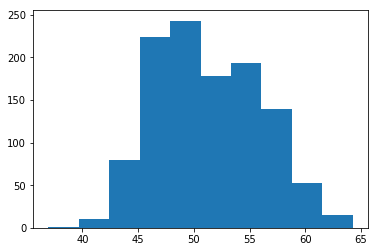

In [282]:
plt.hist(wrong_scores)



(array([0.00279586, 0.01610309, 0.0284694 , 0.06086377, 0.05704634,
        0.03938402, 0.02346911, 0.008522  , 0.0012904 , 0.00040325]),
 array([41.34215927, 45.53771858, 49.73327789, 53.9288372 , 58.12439651,
        62.31995583, 66.51551514, 70.71107445, 74.90663376, 79.10219307,
        83.29775238]),
 <a list of 10 Patch objects>)

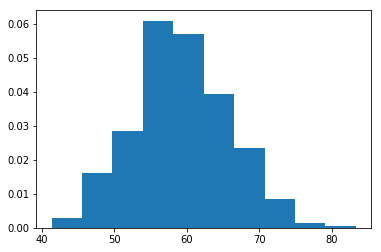

In [236]:
plt.hist(correct_scroes,density=True)

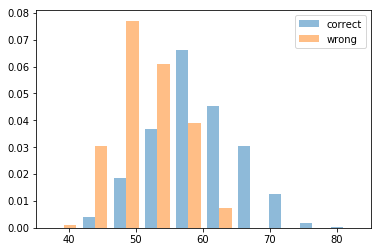

In [19]:
bins = [35,45,55,60,65,70]
plt.hist([correct_scroes,wrong_scores], 10, alpha=0.5, label=['correct','wrong'],density=True)
# plt.hist(wrong_scores, 10, alpha=0.5, label='wrong')
plt.legend(loc='upper right')
# plt.show()

In [18]:
# check unigrams intersection with other relations, both on tokens and entities
# on train as well
for d in result_per_type['member of'][1]:
    show_set(d)
    print()
    

member of	 Being member of european economic area ( EEA ) , Norway implemented the european union directive 2002/24/EC .

sport	 benoît laffineur ( born 30 October 1957 ) is a French former swimmer . 0.00; 40.36
follows	 Wilson was re - elected in the 2003 , 2006 , and 2009 general elections .  0.07; 44.06
member of	 The inaugural Lord Lewis Prize was awarded to lord may of oxford , former President of the royal society and Chief Scientific Advisor to the UK Government , in 2008 .  0.81; 46.46
mother	 In 579 , her stepson Hermenegild married her granddaughter Ingund , daughter of goiswintha 's daughter brunhilda by the Frankish king Sigebert I.  0.00; 40.32
original language of film or TV show	 The film stars the familiar characters from the finnish TV show " the autocrats " in a fairy tale where the inhabitants of a small finnish village have to defend themselves against a despotic emperor .  0.12; 44.52


member of	 papua new guinea became a participating economy in the Asia - Pacifi

original language of film or TV show	 The original french title is " la carrière de suzanne " .  0.00; 37.69
located in or next to body of water	 Jablaničko Lake ( ) is a large artificially formed lake on the neretva river , right below konjic where the neretva briefly expanding into a wide valley .  0.00; 42.88
member of	 brazil is the biggest troop contributing country to MINUSTAH , with 2,200 active military personnel . MINUSTAH Facts and Figures united nations Stabilization Mission in Haiti .  1.00; 57.92
voice type	 klaus könig ( b : May 26 , 1934 in Beuthen , Upper Silesia ) is a German tenor opera singer .  0.00; 43.00


member of	 The royal belgian football association , which governs the team , co - founded the international governing bodies FIFA ( in 1910 ) and uefa ( in 1954 ) .

position played on team / speciality	 benjamin van leer ( born 9 April 1992 in Houten ) is a Dutch professional footballer who currently plays as a goalkeeper for Ajax in the Dutch Eredivisie . 0.00

member of	 fun ’s nate ruess , She & Him ’s Zooey Deschanel and M Ward , Capital Cities’ Sebu Simonian , along with Kacey Musgraves and Peter Hollens .  1.00; 51.86
mother	 anne de bourbon ( 1380 – September 1408 ) was a daughter of John I , Count of La Marche and his wife catherine of vendôme .  0.00; 39.47
voice type	 claudia lindsey ( born 1936 or 1937 Subscription access only ) is an American operatic soprano .  0.00; 45.72
sport	 margaret bamgbose ( born October 19 , 1993 ) is a Nigerian track and field sprinter who specialises in the 400 metres .  0.00; 42.83


member of	 Bonebrake of the band X and matt freeman of the band rancid .

position played on team / speciality	 andreas sandt ( born 5 November 1962 ) is retired a Germany football goalkeeper . 0.17; 45.82
voice type	 susanne mentzer ( born January 21 , 1957 ) is an American operatic mezzo - soprano .  0.23; 46.14
member of	 In the european union , support tends to be the lowest in Bulgaria , Latvia , Poland , Romania , sl

In [377]:
def show_statson_all_relation(correct = 0):
    pred_acc = []
    scores_result = []
    std_result = [] 
    for k,v in result_per_type.items():
        scores_category = np.array(list(map(lambda x: x['scores'][int(x['prediction'])],v[correct])))
        pred_acc.append(len(v[1])/(len(v[0])+len(v[1]))*100)
        scores_result.append(scores_category.mean())
        std_result.append(scores_category.std())
        print(f"{k}:\t {scores_category.mean():.2f} +- {scores_category.std():.2f} ; {len(v[1])/(len(v[0])+len(v[1]))*100:.2f}%")
    #     print( k ,scores_category.mean(), "+-",scores_category.std(), " Acc is:", len(v[1])/(len(v[0])+len(v[1])))
    pred_acc = np.array(pred_acc)
    scores_result = np.array(scores_result)
    std_result = np.array(std_result)
#     X = np.stack((pred_acc,scores_result),axis=0)
#     print(np.cov(X))
#     print(np.corrcoef(np.stack((pred_acc,scores_result),axis=0)))
    return pred_acc,scores_result,std_result

In [378]:
pred_acc,scores_result_correct,std_result_correct = show_statson_all_relation(1)

member of:	 52.39 +- 4.81 ; 70.68%
crosses:	 57.70 +- 1.81 ; 96.08%
part of:	 49.53 +- 4.92 ; 45.32%
mother:	 57.80 +- 3.45 ; 93.34%
child:	 57.03 +- 3.17 ; 91.83%
main subject:	 51.97 +- 5.47 ; 76.88%
military rank:	 56.74 +- 2.41 ; 97.18%
located in or next to body of water:	 57.38 +- 4.81 ; 88.37%
voice type:	 66.81 +- 3.63 ; 100.00%
follows:	 54.76 +- 5.30 ; 94.06%
original language of film or TV show:	 67.70 +- 5.75 ; 100.00%
position played on team / speciality:	 65.38 +- 4.11 ; 99.35%
spouse:	 56.09 +- 4.41 ; 76.10%
competition class:	 65.38 +- 3.63 ; 98.95%
constellation:	 61.39 +- 2.70 ; 99.69%
sport:	 58.71 +- 4.38 ; 87.82%


In [415]:
from scipy.stats import pearsonr


In [418]:
pearsonr(pred_acc,scores_result_correct)


(0.7708279870813365, 0.00047367296754536703)

In [419]:
pred_acc,scores_result_wrong,std_result_wrong = show_statson_all_relation(0)

member of:	 48.09 +- 2.77 ; 70.68%
crosses:	 56.62 +- 2.59 ; 96.08%
part of:	 48.89 +- 3.69 ; 45.32%
mother:	 55.79 +- 3.42 ; 93.34%
child:	 55.71 +- 3.35 ; 91.83%
main subject:	 48.61 +- 3.78 ; 76.88%
military rank:	 54.34 +- 2.02 ; 97.18%
located in or next to body of water:	 55.50 +- 2.95 ; 88.37%
voice type:	 nan +- nan ; 100.00%
follows:	 48.82 +- 3.09 ; 94.06%
original language of film or TV show:	 nan +- nan ; 100.00%
position played on team / speciality:	 57.59 +- 3.30 ; 99.35%
spouse:	 54.66 +- 3.31 ; 76.10%
competition class:	 53.89 +- 3.20 ; 98.95%
constellation:	 53.53 +- 1.26 ; 99.69%
sport:	 56.16 +- 2.95 ; 87.82%


/Users/ofersabo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice.
  
/Users/ofersabo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ofersabo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/ofersabo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/ofersabo/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/ofersabo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice.
  # Remove the CWD from sys.path while we load stuff

In [420]:
pearsonr(pred_acc,scores_result_wrong)

(nan, 1.0)

In [381]:
scores_result_correct - scores_result_wrong

array([ 4.3033874 ,  1.08027885,  0.6406625 ,  2.01155948,  1.32260894,
        3.3636113 ,  2.40315515,  1.88123897,         nan,  5.93286054,
               nan,  7.78982105,  1.43194089, 11.48959497,  7.85309544,
        2.54836989])

In [382]:
print(pred_acc)

[ 70.68403909  96.08433735  45.32019704  93.34442596  91.82692308
  76.88356164  97.17868339  88.36858006 100.          94.0625
 100.          99.3495935   76.10062893  98.95052474  99.68701095
  87.82161235]


In [367]:
np.stack((pred_acc,scores_result),axis=0)

array([[ 70.68403909,  96.08433735,  45.32019704,  93.34442596,
         91.82692308,  76.88356164,  97.17868339,  88.36858006,
        100.        ,  94.0625    , 100.        ,  99.3495935 ,
         76.10062893,  98.95052474,  99.68701095,  87.82161235],
       [ 52.39454387,  57.70474039,  49.5327531 ,  57.80389423,
         57.03262874,  51.97104643,  56.74073742,  57.38047024,
         66.8098016 ,  54.75578932,  67.70288406,  65.37515964,
         56.08818168,  65.38089571,  61.38649311,  58.70906224]])

In [368]:
np.stack((pred_acc,scores_result),axis=0)

array([[ 70.68403909,  96.08433735,  45.32019704,  93.34442596,
         91.82692308,  76.88356164,  97.17868339,  88.36858006,
        100.        ,  94.0625    , 100.        ,  99.3495935 ,
         76.10062893,  98.95052474,  99.68701095,  87.82161235],
       [ 52.39454387,  57.70474039,  49.5327531 ,  57.80389423,
         57.03262874,  51.97104643,  56.74073742,  57.38047024,
         66.8098016 ,  54.75578932,  67.70288406,  65.37515964,
         56.08818168,  65.38089571,  61.38649311,  58.70906224]])

In [408]:
for v in result_per_type["part of"][1]:
    show_set(v)
    print()

part of	 Moffat also brought back the character of River Song from his fourth series episodes " Silence in the Library " and " forest of the dead " .

part of	 Ulcerative colitis and familial adenomatous polyposis are the two main health conditions that lead to removal of the entire colon ( large intestine ) and rectum , which leads to the need for an ileostomy . 0.95; 49.84
child	 In the mythological tradition , hermaphroditus was a beautiful youth who was the son of Hermes ( Roman Mercury ) and aphrodite ( Venus).Ovid , " Metamorphoses " 4.287–88 .  0.02; 45.84
constellation	 NGC 1169 ( ugc 2503 ) is an intermediate barred spiral galaxy in the constellation of perseus .  0.03; 46.29
crosses	 Following a more circuitous route through Farmville in response to financial incentives from the community , the railroad constructed the famous 21 span high bridge across the appomattox river valley about east of Farmville .  0.00; 41.46
mother	 He was the son of Herod the Great and malthace the

part of	 The fleet reached French - owned martinique in the lesser antilles on 10 May 1898 .  0.88; 54.24
spouse	 She was the only daughter of george louis of hanover , later King George I of Great Britain , and his wife sophia dorothea of celle .  0.00; 42.62
located in or next to body of water	 chirinkotan (; Japanese 知林古丹島 ; chirinkotan - tō ) is an uninhabited volcanic island located in the centre of the Kuril Islands chain in the sea of okhotsk in the northwest Pacific Ocean .  0.12; 52.22


part of	 Thus , the song was succeeded as Romanian representative at the 2002 contest by Monica Anghel & Marcel Pavel with " tell me why " .

original language of film or TV show	 Excluding " julayi " , " Eega " , " Rachcha " and Gabbar Singh , no other telugu movie has received such a good response at the USA Box Office in recent months . 0.00; 38.06
part of	 The objectives of the mission were to bring supplies to the international space station ( ISS ) and to prepare the " zvezda " Service M

In [414]:
for k,v in wrong_prediction_which_rel.items():
    print (k)
    print(v.most_common())
    print()
    

crosses
[('located in or next to body of water', 23), ('part of', 2), ('constellation', 1)]

main subject
[('follows', 23), ('part of', 22), ('sport', 21), ('member of', 16), ('constellation', 12), ('original language of film or TV show', 6), ('voice type', 6), ('military rank', 5), ('located in or next to body of water', 5), ('spouse', 5), ('mother', 4), ('crosses', 4), ('competition class', 3), ('child', 2), ('position played on team / speciality', 1)]

part of
[('constellation', 68), ('located in or next to body of water', 55), ('main subject', 46), ('crosses', 43), ('follows', 33), ('member of', 31), ('sport', 14), ('competition class', 9), ('position played on team / speciality', 8), ('voice type', 7), ('original language of film or TV show', 6), ('military rank', 6), ('mother', 3), ('child', 3), ('spouse', 1)]

member of
[('part of', 27), ('voice type', 24), ('constellation', 22), ('military rank', 22), ('competition class', 14), ('main subject', 12), ('sport', 12), ('position pl

In [ ]:
# check agremment with the model prediction 
# try to come up with b=new baselines to show that data is no good
# Elmo should do worse?
# only entity type is helpful?
